### 1.0 — IMPORTING LIBRARIES
signed by Emir Yarkın Yaman a.k.a. WEINOOSE

In [179]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

### 2.0 — FEATURE ENGINEERING

##### 2.0.1 — data location for forecast data.

In [180]:
forecast = pd.DataFrame(pd.read_csv('Izmir Hava Durumu 2018-08.31.2023.csv'))
totalentry_forecast = len(list(forecast[list(forecast.columns)[0]]))

##### 2.0.2 — deleting %30> NaN filled columns at weather forecast, replacing rest of to NaN values to zero.

In [181]:
temp0 = pd.DataFrame(forecast.isna().sum())
temp0.rename(columns={0: 'ixx'}, inplace=True)
temp0 = temp0.query(f'ixx >= {totalentry_forecast*0.3}')
forecast = forecast.drop(columns=temp0.index.to_list(), axis=1).fillna(0)

##### 2.0.3 — copying dataset for seperate time intervals.

In [182]:
forecast00 = forecast.copy(deep=True)
forecast01 = forecast.copy(deep=True)
forecast02 = forecast.copy(deep=True)
forecast03 = forecast.copy(deep=True)
forecast04 = forecast.copy(deep=True)
forecast05 = forecast.copy(deep=True)
forecast06 = forecast.copy(deep=True)
forecast07 = forecast.copy(deep=True)
forecast08 = forecast.copy(deep=True)
forecast09 = forecast.copy(deep=True)
forecast10 = forecast.copy(deep=True)
forecast11 = forecast.copy(deep=True)
forecast12 = forecast.copy(deep=True)
forecast13 = forecast.copy(deep=True)
forecast14 = forecast.copy(deep=True)
forecast15 = forecast.copy(deep=True)
forecast16 = forecast.copy(deep=True)
forecast17 = forecast.copy(deep=True)
forecast18 = forecast.copy(deep=True)
forecast19 = forecast.copy(deep=True)
forecast20 = forecast.copy(deep=True)
forecast21 = forecast.copy(deep=True)
forecast22 = forecast.copy(deep=True)
forecast23 = forecast.copy(deep=True)

##### 2.0.4 — adding timeseries weight for weather forecast by 24-hour basis for one day.

In [183]:
hours_of_days, templist = [], forecast['date'].to_list()
for i in range(0,24):
    hours_of_days.append([])

for i in templist:
    var_date = i
    for q in range(0,24):
        if q < 10:
            var_date_new = f'{var_date} 0{q}:00:00'
        else:
            var_date_new = f'{var_date} {q}:00:00'
        hours_of_days[q].append(var_date_new)

forecast00['date'] = hours_of_days[0]
forecast01['date'] = hours_of_days[1]
forecast02['date'] = hours_of_days[2]
forecast03['date'] = hours_of_days[3]
forecast04['date'] = hours_of_days[4]
forecast05['date'] = hours_of_days[5]
forecast06['date'] = hours_of_days[6]
forecast07['date'] = hours_of_days[7]
forecast08['date'] = hours_of_days[8]
forecast09['date'] = hours_of_days[9]
forecast10['date'] = hours_of_days[10]
forecast11['date'] = hours_of_days[11]
forecast12['date'] = hours_of_days[12]
forecast13['date'] = hours_of_days[13]
forecast14['date'] = hours_of_days[14]
forecast15['date'] = hours_of_days[15]
forecast16['date'] = hours_of_days[16]
forecast17['date'] = hours_of_days[17]
forecast18['date'] = hours_of_days[18]
forecast19['date'] = hours_of_days[19]
forecast20['date'] = hours_of_days[20]
forecast21['date'] = hours_of_days[21]
forecast22['date'] = hours_of_days[22]
forecast23['date'] = hours_of_days[23]

forecast_data = pd.concat([forecast00,forecast01,forecast02,forecast03,forecast04,forecast05,
                           forecast06,forecast07,forecast08,forecast09,forecast10,forecast11,
                           forecast12,forecast13,forecast14,forecast15,forecast16,forecast17,
                           forecast18,forecast19,forecast20,forecast21,forecast22,forecast23], ignore_index=True, axis=0)

forecast_data.rename(columns={'date': 'Tarih'}, inplace=True)

forecast_data = forecast_data.sort_values('Tarih', ascending=True)
forecast_data = forecast_data.reset_index()
forecast_data = forecast_data.drop(columns=['index'], axis=1)

##### 2.1.0 — merging datasets.

In [184]:
train_data = pd.DataFrame(pd.read_csv('train.csv'))
test_dates = pd.DataFrame(pd.read_csv('sample_submission.csv'))
august = forecast_data.drop(labels=range(0, 40152), axis=0)

data = pd.concat([train_data.merge(forecast_data, on='Tarih', how='inner'), 
                  test_dates.merge(august, on='Tarih', how='inner')], 
                  ignore_index=True, axis=0)

##### 2.2.0 — identifying power outages with the help of 'med.csv'

In [185]:
outage, new_med_data = [], []
med_data = pd.DataFrame(pd.read_csv('med.csv'))['Tarih'].to_list()

for var_date in med_data:
    var_date = str(var_date.replace('.','-')).split('-')
    if int(var_date[0]) < 10:
        var_date = f'{var_date[2]}-{var_date[1]}-0{var_date[0]}'
    else:
        var_date = f'{var_date[2]}-{var_date[1]}-{var_date[0]}'
    for hour in range(0,24):
        if hour < 10:
            var = f'{var_date} 0{hour}:00:00'
        else:
            var = f'{var_date} {hour}:00:00'
        new_med_data.append(var)
new_med_data.sort()

##### 2.2.1 — creating a binary column about power outage, and adding them to both test and train datas.

In [186]:
for i in data['Tarih'].to_list():
    if i in new_med_data:
        outage.append(1)
    else:
        outage.append(0)

data['Majör Elektrik Kesintisi'] = outage

##### 2.3.0 — now adding extra weights like; weekin, weekend. / day of the year. / week of the year. / morning, afternoon, evening, night... also 01.01.2018 is monday so we are good!

In [187]:
dates = preprocessing.LabelEncoder().fit_transform(data['Tarih'])
hours = []

day_status = []
weekends = []
day_of_the_year = []
week_of_the_year = []

for i in data['Tarih'].to_list():
    hours.append(int(i[11:13]))

for hour in hours:
    if 10 >= hour >= 6:
        day_status.append('sabah')
    elif 16 >= hour >= 11:
        day_status.append('öğlen')
    elif 21 >= hour >= 17:
        day_status.append('akşam')
    else:
        day_status.append('gece')

for day in dates:
    # weekend finder.
    the_date = datetime.date(2018, 1, 1) + datetime.timedelta(days=int(day))
    day_of_the_week = the_date.weekday()
    if day_of_the_week == 5 or day_of_the_week == 6:
        weekends.append(1)
    else:
        weekends.append(0)

for day in dates:
    # day of the year finder.
    the_date = datetime.date(2018, 1, 1) + datetime.timedelta(days=int(day))
    day_of_the_year.append(the_date.timetuple().tm_yday)

for day in dates:
    # week of the year finder.
    the_date = datetime.date(2018, 1, 1) + datetime.timedelta(days=int(day))
    week_of_the_year.append(the_date.isocalendar()[1])

# label encoding the day status to convert string values to numerical features.
day_status = preprocessing.LabelEncoder().fit_transform(day_status)

# let's convert date column into seperate columns.
day, month, year, hourrr = [], [], [], []
for i in data['Tarih'].to_list():
    year.append(int(i[0:4]))
    month.append(int(i[5:7]))
    day.append(int(i[8:10]))
    hourrr.append(int(i[11:13]))
data = data.drop(columns=['Tarih'],axis=1)

# finalizing the assignments volume-1.
data['Günün Vakti'] = day_status
data['Yılın Günü'] = day_of_the_year
data['Yılın Haftası'] = week_of_the_year
data['Haftasonu'] = weekends
data['Yıl'] = year
data['Ay'] = month
data['Gün'] = day
data['Saat'] = hour

# adding more extra weights. / official holidays.
official_holidays = ['2018-1-1','2018-4-23','2018-5-1','2018-5-19','2018-8-30','2018-10-28',
                     '2018-10-29','2018-7-15','2018-6-14','2018-6-15','2018-6-16','2018-6-17',
                     '2018-8-20','2018-8-21','2018-8-22','2018-8-23','2018-8-24','2019-1-1',
                     '2019-4-23','2019-5-1','2019-5-19','2019-8-30','2019-10-28','2019-10-29',
                     '2019-7-15','2019-6-4','2019-6-5','2019-6-6','2019-6-7','2019-8-10',
                     '2019-8-11','2019-8-12','2019-8-13','2019-8-14','2020-1-1','2020-4-23',
                     '2020-5-1','2020-5-19','2020-8-30','2020-10-28','2020-10-29','2020-7-15',
                     '2020-5-23','2020-5-24','2020-5-25','2020-5-26','2020-7-30','2020-7-31',
                     '2020-8-1','2020-8-2','2020-8-3','2021-1-1','2021-4-23','2021-5-1',
                     '2021-5-19','2021-8-30','2021-10-28','2021-10-29','2021-7-15','2021-5-12',
                     '2021-5-13','2021-5-14','2021-5-15','2021-7-19','2021-7-20','2021-7-21',
                     '2021-7-22','2021-7-23','2022-1-1','2022-4-23','2022-5-1','2022-5-19',
                     '2022-8-30','2022-10-28','2022-10-29','2022-7-15','2022-5-2','2022-5-3',
                     '2022-5-4','2022-7-8','2022-7-9','2022-7-10','2022-7-11','2022-7-12']
numeric_holidays = []

for r,m,n in zip(list(data['Yıl']),list(data['Ay']),list(data['Gün'])):
    hol = str(f'{r}-{m}-{n}')
    if hol in official_holidays:
        numeric_holidays.append(1)
    else:
        numeric_holidays.append(0)

data['Resmi Tatil_temp'] = numeric_holidays

# adding more extra weights. / ramadan holiday.
ramadan_holidays = ['2018-5-16','2018-5-17','2018-5-18','2018-5-19','2018-5-20','2018-5-21','2018-5-22','2018-5-23','2018-5-24',
                    '2018-5-25','2018-5-26','2018-5-27','2018-5-28','2018-5-29','2018-5-30','2018-5-31','2018-6-1','2018-6-2',
                    '2018-6-3','2018-6-4','2018-6-5','2018-6-6','2018-6-7','2018-6-8','2018-6-9','2018-6-10','2018-6-11',
                    '2018-6-12','2018-6-13','2018-6-14',
                    
                    '2019-5-6','2019-5-7','2019-5-8','2019-5-9','2019-5-10','2019-5-11','2019-5-12','2019-5-13','2019-5-14',
                    '2019-5-15','2019-5-16','2019-5-17','2019-5-18','2019-5-19','2019-5-20','2019-5-21','2019-5-22','2019-5-23',
                    '2019-5-24','2019-5-25','2019-5-26','2019-5-27','2019-5-28','2019-5-29','2019-5-30','2019-5-31','2019-6-1',
                    '2019-6-2','2019-6-3',
                    
                    '2020-4-24','2020-4-25','2020-4-26','2020-4-27','2020-4-28','2020-4-29','2020-4-30','2020-5-1','2020-5-2',
                    '2020-5-3','2020-5-4','2020-5-5','2020-5-6','2020-5-7','2020-5-8','2020-5-9','2020-5-10','2020-5-11',
                    '2020-5-12','2020-5-13','2020-5-14','2020-5-15','2020-5-16','2020-5-17','2020-5-18','2020-5-19','2020-5-20',
                    '2020-5-21','2020-5-22','2020-5-23',
                    
                    '2021-4-13','2021-4-14','2021-4-15','2021-4-16','2021-4-17','2021-4-18','2021-4-19','2021-4-20','2021-4-21',
                    '2021-4-22','2021-4-23','2021-4-24','2021-4-25','2021-4-26','2021-4-27','2021-4-28','2021-4-29','2021-4-30',
                    '2021-5-1','2021-5-2','2021-5-3','2021-5-4','2021-5-5','2021-5-6','2021-5-7','2021-5-8','2021-5-9',
                    '2021-5-10','2021-5-11','2021-5-12',
                    
                    '2022-4-2','2022-4-3','2022-4-4','2022-4-5','2022-4-6','2022-4-7','2022-4-8','2022-4-9','2022-4-10',
                    '2022-4-11','2022-4-12','2022-4-13','2022-4-14','2022-4-15','2022-4-16','2022-4-17','2022-4-18','2022-4-19',
                    '2022-4-20','2022-4-21','2022-4-22','2022-4-23','2022-4-24','2022-4-25','2022-4-26','2022-4-27','2022-4-28',
                    '2022-4-29','2022-4-30','2022-5-1']

numeric_ramadan = []

for c,v,b in zip(list(data['Yıl']),list(data['Ay']),list(data['Gün'])):
    rhol = str(f'{c}-{v}-{b}')
    if rhol in ramadan_holidays:
        numeric_ramadan.append(1)
    else:
        numeric_ramadan.append(0)

data['Ramazan_temp'] = numeric_ramadan

# adding seasons.
seasons = []
for i in data['Ay'].to_list():
    if 5 >= i >= 3:
        seasons.append(1)
    elif 8 >= i >= 6:
        seasons.append(2)
    elif 11 >= i >= 9:
        seasons.append(3)
    else:
        seasons.append(0)

data['Mevsim'] = seasons

# handling cyclical data.
data['sin(Günün Vakti)'] = np.sin((2*np.pi*data['Günün Vakti'])/data['Günün Vakti'].max())
data['cos(Günün Vakti)'] = np.cos((2*np.pi*data['Günün Vakti'])/data['Günün Vakti'].max())
data = data.drop(columns=['Günün Vakti'], axis=1)

data['sin(Yılın Günü)'] = np.sin((2*np.pi*data['Yılın Günü'])/data['Yılın Günü'].max())
data['cos(Yılın Günü)'] = np.cos((2*np.pi*data['Yılın Günü'])/data['Yılın Günü'].max())
data = data.drop(columns=['Yılın Günü'], axis=1)

data['sin(Yılın Haftası)'] = np.sin((2*np.pi*data['Yılın Haftası'])/data['Yılın Haftası'].max())
data['cos(Yılın Haftası)'] = np.cos((2*np.pi*data['Yılın Haftası'])/data['Yılın Haftası'].max())
data = data.drop(columns=['Yılın Haftası'], axis=1)

data['sin(Saat)'] = np.sin((2*np.pi*data['Saat'])/data['Saat'].max())
data['cos(Saat)'] = np.cos((2*np.pi*data['Saat'])/data['Saat'].max())
data = data.drop(columns=['Saat'], axis=1)

data['sin(Gün)'] = np.sin((2*np.pi*data['Gün'])/data['Gün'].max())
data['cos(Gün)'] = np.cos((2*np.pi*data['Gün'])/data['Gün'].max())
data = data.drop(columns=['Gün'], axis=1)


data['sin(Ay)'] = np.sin((2*np.pi*data['Ay'])/data['Ay'].max())
data['cos(Ay)'] = np.cos((2*np.pi*data['Ay'])/data['Ay'].max())
data = data.drop(columns=['Ay'], axis=1)

data['sin(Mevsim)'] = np.sin((2*np.pi*data['Mevsim'])/data['Mevsim'].max())
data['cos(Mevsim)'] = np.cos((2*np.pi*data['Mevsim'])/data['Mevsim'].max())
data = data.drop(columns=['Mevsim'], axis=1)

# some placement corrections.
data['Resmi Tatil'] = data['Resmi Tatil_temp'].values
data['Ramazan'] = data['Ramazan_temp'].values

data = data.drop(columns=['Resmi Tatil_temp'], axis=1)
data = data.drop(columns=['Ramazan_temp'], axis=1)

# label encoding on year feature.
data['Yıl'] = preprocessing.LabelEncoder().fit_transform(data['Yıl'])

# handling weather forecast data again.
data = data.drop(columns=['prcp'],axis=1)

#
data['Dağıtılan Enerji (MWh)'] = (data['Dağıtılan Enerji (MWh)'])*(36*(10**5))
data.rename(columns = {'Dağıtılan Enerji (MWh)':'Dağıtılan Enerji (Joule)'}, inplace = True)

# finalizing.
data = data
TEST = data.drop(labels=range(0, 40152), axis=0)

### 3.0 — TRAIN & TEST SPLIT

In [188]:
from sklearn.model_selection import train_test_split
data = data.drop(labels=range(40152, 40896), axis=0)
y = data['Dağıtılan Enerji (Joule)'].values

data = data.drop(columns=['Dağıtılan Enerji (Joule)'], axis = 1)
x = data.values

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.02, random_state=0)

### 4.0 — FEATURE PRE-PROCESSING / NORMALIZATION

In [189]:
normalize_on_off = 'off'
if normalize_on_off == 'on':
    x_train = preprocessing.normalize(x_train)
    x_test = preprocessing.normalize(x_test)

### 5.0 — REGULARIZATION / GATHERING TRAIN RESULTS

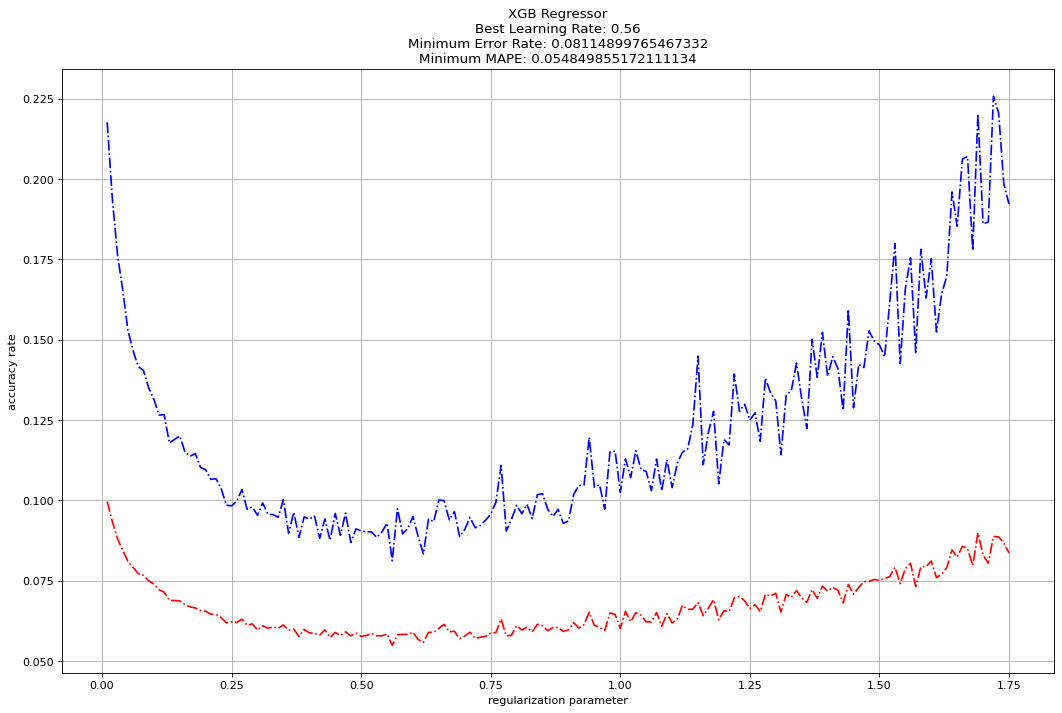

In [190]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score

xgb_optimization_results = {}

def xgb_optimization(start,stop,step):
    
    test_error_list = []
    test_mape_list = []
    eta_list = []

    for c in np.arange(start,stop,step):
        
        # ,objective='reg:squarederror',reg_alpha=57.0,reg_lambda=0.9,gamma=4.2,max_depth=17,booster='gbtree'
        MODEL = XGBRegressor(n_estimators=1000,eta=c,eval_metric='mape')
        
        MODEL.fit(x_train,y_train) 
        y_pred = MODEL.predict(x_test)

        test_error_list.append((1.0) - (r2_score(y_test,y_pred)))
        test_mape_list.append(mean_absolute_percentage_error(y_test,y_pred))
        
        eta_list.append(c)

    xgb_optimization_results['XGB Regressor'] = [eta_list[test_error_list.index(min(test_error_list))],min(test_error_list)]

    plt.figure(figsize=(16,10),dpi=80)
    plt.grid()
    plt.title(f'XGB Regressor\nBest Learning Rate: {eta_list[test_error_list.index(min(test_error_list))]}\nMinimum Error Rate: {min(test_error_list)}\nMinimum MAPE: {test_mape_list[test_error_list.index(min(test_error_list))]}')
    plt.plot(eta_list, test_error_list, label='Test Accuracy',c = 'blue',linestyle='dashdot')
    plt.plot(eta_list, test_mape_list, label='MAPE',c = 'red',linestyle='dashdot')
    plt.ylabel('accuracy rate')
    plt.xlabel("regularization parameter")

xgb_optimization(0.01,1.76,0.01)

MODEL = XGBRegressor(n_estimators=1000,eta=xgb_optimization_results['XGB Regressor'][0],eval_metric='mape')

### 6.0 — MODEL EVALUATION

In [191]:
# train values.
x_train = x
y_train = y

# test values. (not seen by the machine learning model yet.)
y_test = TEST['Dağıtılan Enerji (Joule)'].values
TEST = TEST.drop(columns=['Dağıtılan Enerji (Joule)'], axis=1)
x_test = TEST.values

if normalize_on_off == 'on':
    x_train = preprocessing.normalize(x_train)
    x_test = preprocessing.normalize(x_test)

# final.
MODEL.fit(x_train, y_train)
y_predicted = MODEL.predict(x_test)

# saving into the submission.
final, sample_submission = pd.DataFrame(), pd.DataFrame(pd.read_csv('sample_submission.csv'))
final['Tarih'] = sample_submission['Tarih']
final['Dağıtılan Enerji (Joule)'] = y_predicted

final['Dağıtılan Enerji (Joule)'] = (final['Dağıtılan Enerji (Joule)'])/(36*(10**5))
final.rename(columns = {'Dağıtılan Enerji (Joule)':'Dağıtılan Enerji (MWh)'}, inplace = True)

In [192]:
final.to_csv("finalsubmissionrevised.csv",index=None)